Train Accuracy for Decision Tree Classifier: 88.13868613138686%
Test Accuracy for Decision Tree Classifier: 40.98360655737705%


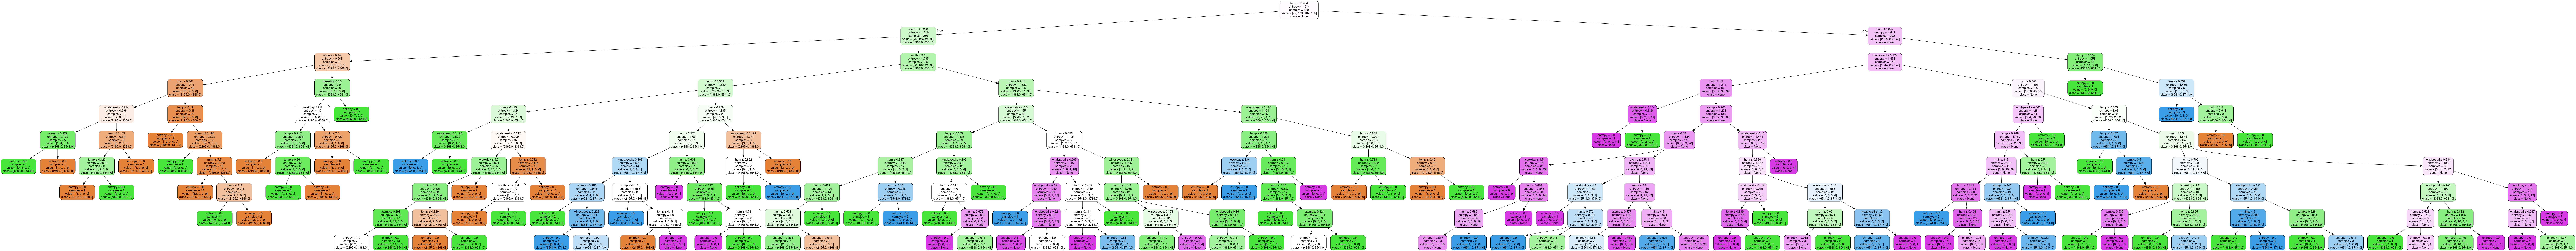

In [22]:
#Below there is the implementation for Desicion Tree classifier
#I have load the data into a dataframe and i have split them into 4 class based (cheating)
#on what panda.cut has gave me. Then i load then into a new column names ladel.
#Then i apply the desicion tree classifier into dataframe with 80 - 20 ration for train
#and test data.
#The overfitting has not occured while i have a accuracy on test data about 80 %
#while i have low accuracy for test data. I have tried different bins for my data
#and keeping different columns (for example i tried exclude mnth,workinday) because
#there is some "corellation" but i did not have great progress.
#The 2 prominent feature is temperature temp and atemp based on entropy criterion.



import sklearn.datasets as datasets
import pandas as pd
import numpy as np
mydata = pd.read_csv("https://raw.githubusercontent.com/MSc-in-Data-Science/class_material/master/semester_1/Machine_Learning/datasets/bike-sharing-dataset/day.csv")
mydata = mydata.drop(['dteday'], axis=1)
columns=['mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
df=pd.DataFrame(mydata,columns = columns) 
                
                
#columns=['mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'])



names2 = ['(13.308, 2195.0]', '(2195.0, 4368.0]' , '(4368.0, 6541.0]' , '(6541.0, 8714.0]']


bins = [0, 891.2, 1760.4, 2629.6, 3498.8, 4368.0, 5237.2, 6106.4, 6975.6,7844.8,8714.0]
bins2 =  [0, 13.308, 2195.0,4368.0,5237.2, 6541.0, 8714.0]
class_name = pd.cut(mydata.cnt, 4)
#print(class_name)
d = dict(enumerate(names2, 1))
df2=pd.DataFrame(mydata)
df2['bins'] = np.vectorize(d.get)(np.digitize(mydata['cnt'], bins2))
df2['label'] = df2.bins.astype("category").cat.codes



y=df2.label.values


from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df, y, test_size = 0.25, random_state = 0)


depth =9
class_name=df2['bins'].unique()
from sklearn.tree import DecisionTreeClassifier
dtreeTrain=DecisionTreeClassifier(max_depth=depth, criterion='entropy')
dtreeTrain.fit(xTrain,yTrain)
dtreeTest=DecisionTreeClassifier(max_depth=depth, criterion='entropy')
dtreeTest.fit(xTest,yTest)


clrTree = DecisionTreeClassifier(max_depth=depth,criterion='entropy')
clrTree = clrTree.fit(xTrain,yTrain)
Train   = clrTree.predict(xTrain)
outTree = clrTree.predict(xTest)
#print(dtreeTrain.feature_importances_.tolist())

from sklearn.metrics import accuracy_score
print("Train Accuracy for Decision Tree Classifier: " + str(accuracy_score(yTrain, Train)*100)+"%")
print("Test Accuracy for Decision Tree Classifier: " + str(accuracy_score(yTest, outTree)*100)+"%")
import pydot
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_dataTrain = StringIO()
export_graphviz(dtreeTrain, out_file=dot_dataTrain,
                feature_names=columns, 
                class_names=class_name,
                filled=True, rounded=True,
                special_characters=True)
graphs = pydot.graph_from_dot_data(dot_dataTrain.getvalue())
#graph = pydot.graph_from_dot_data(dot_data)
Image(graphs[0].create_png())





